In [19]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"running device :- {device}")

running device :- cuda


In [9]:
df = pd.read_csv("/content/fashion_mnist.csv")

In [10]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
69996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
69997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
69998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


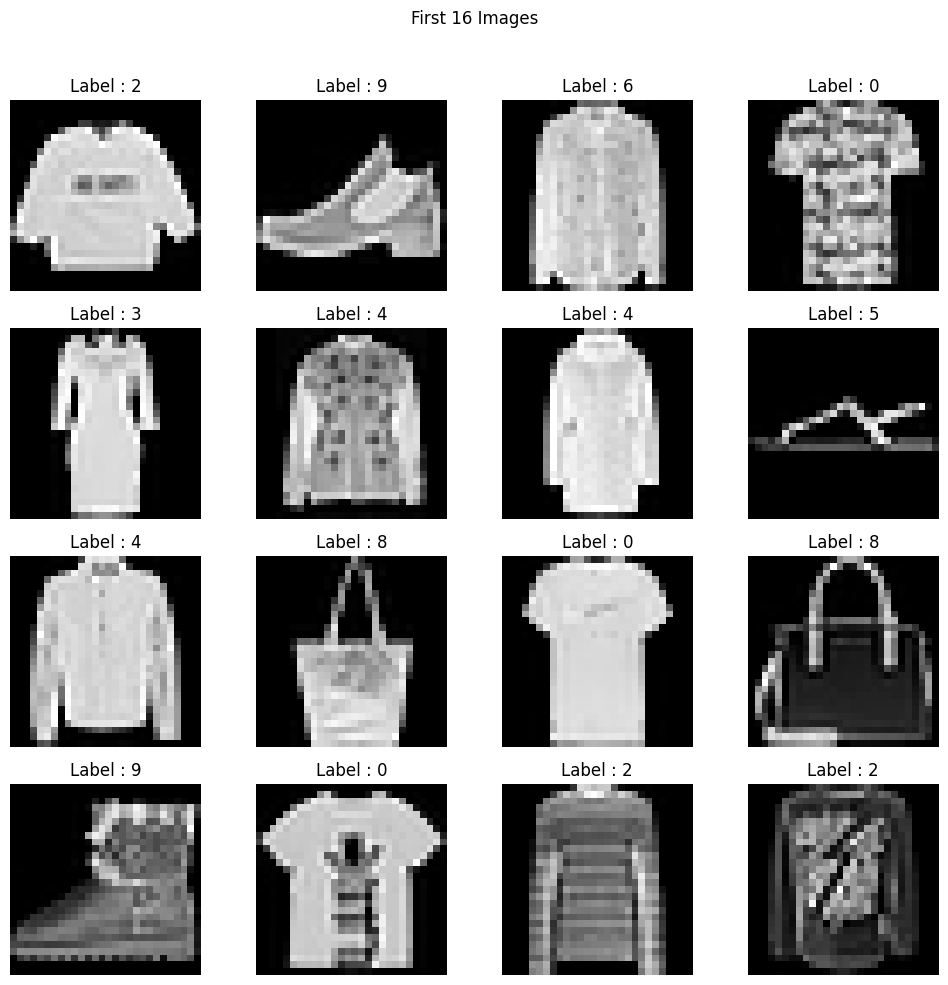

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(10,10))
fig.suptitle("First 16 Images")

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img, cmap="gray")
    ax.axis("off")
    ax.set_title(f"Label : {df.iloc[i, 0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [14]:
x = df.drop("label", axis=1).values
y = df["label"].values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2
)

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [20]:
class CustomDataset(Dataset):

    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [21]:
train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)

In [22]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [23]:
class NeuralNetwork(nn.Module):

    def __init__(self, num_features):
        super().__init__()

        self.network = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax()
        )

    def forward(self, x):
        out = self.network(x)

        return out

In [24]:
model = NeuralNetwork(x_train.shape[1])

In [29]:
model.to(device)

NeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)

In [30]:
learning_rate = 0.1

In [31]:
epochs = 25

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [34]:
for epoch in range(epochs):

    total_epoch_loss = 0

    for batch_feature, batch_label in train_loader:

        # move data to gpu
        batch_feature = batch_feature.to(device)
        batch_label = batch_label.to(device)

        # forward pass
        out = model(batch_feature)

        # loss function
        loss = criterion(out, batch_label)

        # back pass
        optimizer.zero_grad()
        loss.backward()

        # update grads
        optimizer.step()

        total_epoch_loss += loss.item()

    avg_loss = total_epoch_loss / len(train_loader)

    print(f"Epoch : {epoch+1} | Loss : {avg_loss}")

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1775: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch : 1 | Loss : 1.6193748259544372
Epoch : 2 | Loss : 1.619205166203635
Epoch : 3 | Loss : 1.6186210254260471
Epoch : 4 | Loss : 1.6184345242636544
Epoch : 5 | Loss : 1.617455167566027
Epoch : 6 | Loss : 1.6167879629135131
Epoch : 7 | Loss : 1.6166066026687622
Epoch : 8 | Loss : 1.6157643297059194
Epoch : 9 | Loss : 1.6150681448663984
Epoch : 10 | Loss : 1.6148741451672146
Epoch : 11 | Loss : 1.6141065497398377
Epoch : 12 | Loss : 1.6134978470802308
Epoch : 13 | Loss : 1.6136922864232746
Epoch : 14 | Loss : 1.613837484087263
Epoch : 15 | Loss : 1.6117959095409937
Epoch : 16 | Loss : 1.612384989602225
Epoch : 17 | Loss : 1.6122808160100663
Epoch : 18 | Loss : 1.6119908314432416
Epoch : 19 | Loss : 1.6117422093663898
Epoch : 20 | Loss : 1.6099259510040282
Epoch : 21 | Loss : 1.6095086115428379
Epoch : 22 | Loss : 1.610207137448447
Epoch : 23 | Loss : 1.6096751524380275
Epoch : 24 | Loss : 1.608537942818233
Epoch : 25 | Loss : 1.6089466676712036


In [35]:
model.eval()

NeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)

In [36]:
total = 0
correct = 0

with torch.no_grad():
    for batch_feature, batch_label in test_loader:

        batch_feature = batch_feature.to(device)
        batch_label = batch_label.to(device)

        out = model(batch_feature)

        _, predicted = torch.max(out, 1)

        total = total + batch_label.shape[0]

        correct += (predicted == batch_label).sum().item()

    print(correct / total)

0.8369285714285715
